In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from scipy import stats
%matplotlib inline

# Load features

We load the features with their description from the provided file and we store into a dictionary `features_description`.

In [33]:
features_description = {}
for line in open('columns.txt'):
    key, value = line.split(":")
    features_description[key] = value.replace("\n","")
print("Total features: {}".format(len(features_description)))

Total features: 79


# Load dataset

Dataset is loaded into variables `train_data`, whose type is pandas Dataframe

In [34]:
train_data = pd.read_csv('housing_train.csv')
shape = train_data.shape
print("loaded {} records. There are {} features.".format(shape[0],shape[1]))

loaded 1460 records. There are 81 features.


# Clean data (Phase I)

- Let's remove duplicated records
- Feature `Id` is useless, we remove it.

In [35]:
train_data = train_data.drop_duplicates()
# errors=ignore is used to skip not existing column in case of we run this stateme more than once
train_data.drop(['Id'], axis='columns', inplace=True, errors='ignore' )
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Show an overview of our train dataset

In [36]:
## We disable de max numbuber of columns by default
pd.set_option('display.max_columns', None)
train_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Explore numerical features

In [37]:
features_numerical = ['YearBuilt','LotFrontage','LotArea',
 'YearRemodAdd','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea',
 'MasVnrArea','BsmtHalfBath','BsmtFullBath', 'FullBath', 'HalfBath', 
 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 
 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 
 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'SalePrice'
]

def show_numerical_features():
    features_numerical.sort()

    combo_numerical_features = widgets.Dropdown(
        options= features_numerical,
        description='Feature:',
    )

    def on_change_numerical_feature(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output_numerical_stats:
                output_numerical_stats.clear_output()
                feature = change['new']
                print("Description: {}".format(features_description[feature]))
                print("Null values:  {}".format(train_data[feature].isna().sum()))
                print(train_data[feature].describe())


    output_numerical_stats = widgets.Output(layout = widgets.Layout(height='200px'))
    combo_numerical_features.observe(on_change_numerical_feature)
    display(combo_numerical_features)
    display(output_numerical_stats)
    
show_numerical_features()

Dropdown(description='Feature:', options=('1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', '…

Output(layout=Layout(height='200px'))

# Explore categorical features

In [38]:
features_categorical = [
    'MSSubClass', 'MSZoning', 'Street','Alley','LotShape','LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType','HouseStyle', 'OverallQual','OverallCond','RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir', 
    'Electrical', 'KitchenQual','Functional', 'FireplaceQu','GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
    'PoolQC', 'Fence', 'MiscFeature', 'MoSold','YrSold','SaleType','SaleCondition'
]

def show_categorical_features():
    features_categorical.sort()

    combo_categorical_features = widgets.Dropdown(
        options= features_categorical,
        description='Feature:',
    )

    def on_change_categorical_feature(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output_categorical_stats:
                feature = change['new']
                output_categorical_stats.clear_output()
                print("Description: {}".format(features_description[feature]))
                print("Null values:  {}".format(train_data[feature].isna().sum()))
                data = train_data[feature].value_counts()
                labels = data.index.tolist()
                plt.pie(data,labels=labels, autopct='%1.0f%%')
                p=plt.gcf()
                plt.legend(labels, loc="best")
                plt.axis('equal')
                plt.tight_layout()
                plt.show()


    output_categorical_stats = widgets.Output(layout = widgets.Layout(height='350px'))
    combo_categorical_features.observe(on_change_categorical_feature)
    display(combo_categorical_features)
    display(output_categorical_stats)

show_categorical_features()

Dropdown(description='Feature:', options=('Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Bs…

Output(layout=Layout(height='350px'))

# Clean data (Phase II)

Since we have a big number of features we will do some effort to normalize them and drop the noisy features

- There's a numercial feature `PoolArea` & a categorial_variable `PoolQC`. Actually most of the houses in the train dataset don't have a pool, so we can create a new categorical feature named `HasPool`whose values will be 0 and 1 and remove the features `PoolArea` and `PoolQC`. 
- Feature `Alley` has too much null values, so we will drop it from the train dataset.
- There are 4 variables `BsmtFullBath`, `BsmtHalfBath`, `HalfBath`, `FullBath` that will nromalize into a single numerical variables named `TotalBaths`.
- There are too much null values for feature `Fence` so we will remove it from the dataset.
- There are too much null values for feature `MiscFeature` so we will remove it from the dataset.
- Most of the records of `Condition1` and `Condition2` belong to a same category, so we will remove these two features.
- There are 4 variables `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch` that will nromalize into a single numerical variables named `AreaPorch`.
- Let's remove those categorical features that contains a value in more of the 80% of the records
- Let's remove those numerical features whose minimum value & percentile 50% is the same value, because that neans that most of values has the same value
- There are a lot of features about the garage... I decide to drop `GarageArea`, `GarageFinish`, `GarageYrBlt` `GarageType` and keep only `GarageCars`
- `YearBuilt`, `YearRemodAdd` don't make sense at all. They will be normalized into `BuiltAgo` and `RemodAddAgo`, and their values will be recalculated. 
- We will remove the nan values. We will remove those features in which the 30% or more of its records are nan, and we will also remove the records that contains more than 5 nan values in all the features.

In [42]:


# Pool features
if 'PoolArea' in train_data:
    train_data['HasPool'] = train_data.apply (lambda row: 1 if row['PoolArea']>0.000000 else 0, axis=1)
    train_data.drop(['PoolArea','PoolQC'],axis='columns', inplace=True, errors='ignore')
    features_numerical.remove('PoolArea')
    features_categorical.remove('PoolQC')
    features_categorical.append('HasPool')
    features_description['HasPool']='It is 1 if there is a pool in the house, otherwise It is 0'
    
if 'Alley' in train_data:
    train_data.drop(['Alley'],axis='columns', inplace=True, errors='ignore')
    features_categorical.remove('Alley')
    
if 'BsmtFullBath' in train_data:
    train_data['TotalBaths'] = train_data.apply (lambda row: row.BsmtFullBath + row.BsmtHalfBath + row.HalfBath + row.FullBath, axis=1)
    train_data.drop(['BsmtFullBath','BsmtHalfBath','HalfBath','FullBath'],axis='columns', inplace=True, errors='ignore')
    features_numerical.remove('BsmtFullBath')
    features_numerical.remove('BsmtHalfBath')
    features_numerical.remove('HalfBath')
    features_numerical.remove('FullBath')
    
if 'Fence' in train_data:
    train_data.drop(['Fence'],axis='columns', inplace=True, errors='ignore')
    features_categorical.remove('Fence')

if 'MiscFeature' in train_data:
    train_data.drop(['MiscFeature'],axis='columns', inplace=True, errors='ignore')
    features_categorical.remove('MiscFeature')
    
if 'Condition1' in train_data:
    train_data.drop(['Condition1'],axis='columns', inplace=True, errors='ignore')
    features_categorical.remove('Condition1')
    train_data.drop(['Condition2'],axis='columns', inplace=True, errors='ignore')
    features_categorical.remove('Condition2')

    
if 'EnclosedPorch' in train_data:
    train_data['AreaPorch'] = train_data.apply (lambda row: row.OpenPorchSF + row.EnclosedPorch + row['3SsnPorch'] + row.ScreenPorch, axis=1)
    train_data.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis='columns', inplace=True, errors='ignore')
    features_numerical.remove('OpenPorchSF')
    features_numerical.remove('EnclosedPorch')
    features_numerical.remove('3SsnPorch')
    features_numerical.remove('ScreenPorch')

    
    
for feature in features_categorical:
    data = train_data[feature].value_counts(normalize=True)
    if (data>0.8).any():
        print('remove {}'.format(feature))  
        train_data.drop([feature],axis='columns', inplace=True, errors='ignore')
        features_categorical.remove(feature)
        
for feature in features_categorical:
    data = train_data[feature].value_counts(normalize=True)
    if (data.isna().sum()>20):
        print('remove {}'.format(feature))  
        
        

for feature in features_numerical:
    if train_data[feature].describe()['50%']==train_data[feature].describe()['min']:
        print('remove {}'.format(feature))
        train_data.drop([feature],axis='columns', inplace=True, errors='ignore')
        features_numerical.remove(feature)

                 
if 'GarageType' in train_data:
    train_data.drop(['GarageYrBlt''GarageArea','GarageType','GarageFinish'],axis='columns', inplace=True, errors='ignore')
    features_categorical.remove('GarageType')
    features_categorical.remove('GarageFinish')
    features_numerical.remove('GarageYrBlt')
    features_numerical.remove('GarageArea')


if 'YearBuilt' in train_data:
    train_data['BuiltAgo'] = train_data.apply (lambda row: row.YrSold - row.YearBuilt, axis=1)
    train_data['RemodAddAgo'] = train_data.apply (lambda row: (row.YrSold - row.YearRemodAdd) if row.YearRemodAdd else (row.YrSold - row.YearBuilt), axis=1)
    train_data.drop(['YearBuilt','YearRemodAdd'],axis='columns', inplace=True, errors='ignore')
    features_numerical.remove('YearBuilt')
    features_numerical.remove('YearRemodAdd')
    features_numerical.append('BuiltAgo')
    features_numerical.append('RemodAddAgo')
    

for feature in train_data.columns:
    total_na = train_data[feature].isna().sum()
    if total_na > len(train_data)*0.3:
        train_data.drop([feature],axis='columns', inplace=True)
        if feature in features_numerical:
            features_numerical.remove(feature)
        else:
            features_categorical.remove(feature)
            
for i, j in train_data.iterrows():
    total_nan  = train_data.loc[[i]].isna().sum().sum()
    if total_nan > 5:
        train_data = train_data.drop([i],axis="rows")
        


    


        


# Let's see the sale price by features

Dropdown(description='Feature:', options=('1stFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinTy…

Output(layout=Layout(height='300px'))

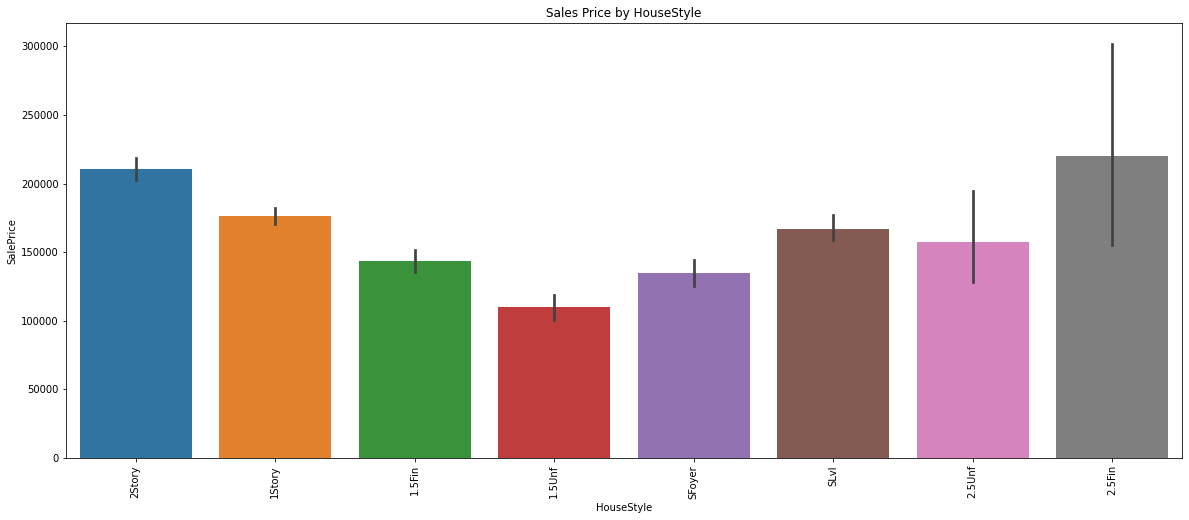

In [43]:
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

features = features_numerical + features_categorical
features.sort()

combo_alll_features = widgets.Dropdown(
    options=features,
    description='Feature:',
)

def on_change_feature(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with out_price_by_feature:
            feature = change['new']
            out_price_by_feature.clear_output()
            fig, axs = plt.subplots()
            fig.set_size_inches(20, 8)
            sns.barplot(x=feature, y='SalePrice', data=train_data, ax=axs)
            axs.set(title='Sales Price by {}'.format(feature))
            axs.tick_params(axis='x', labelrotation=90)
            

        
out_price_by_feature = widgets.Output(layout = widgets.Layout(height='300px'))
combo_alll_features.observe(on_change_feature)
display(combo_alll_features)
display(out_price_by_feature)

# Correlation matrix

Correlation matrix only support numerical values, so we will encode the categorial features into numerical ones.
We do a `Ordinal Encoding`.  First of all we will fill na values with `unknown` for the categorical features

In [44]:

for feature in features_categorical:
    train_data[feature].fillna( 'unknown', inplace = True)        

for feature in features_categorical:
    values = train_data[feature].unique()
    train_data[feature] = train_data.apply (lambda row: np.where(values == row[feature])[0][0] , axis=1)
    features_numerical.append(feature)

 
train_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,TotalBaths,AreaPorch,BuiltAgo,RemodAddAgo
0,0,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,706,150,856,0,856,1710,3,1,0,8,0,2003.0,2,548,0,0,208500,4,61,5,5
1,1,0,80.0,9600,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,978,284,1262,0,1262,1262,3,1,1,6,1,1976.0,2,460,1,1,181500,3,0,31,31
2,0,0,68.0,11250,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,486,434,920,0,920,1786,3,1,0,6,1,2001.0,2,608,2,0,223500,4,42,7,6
3,2,0,60.0,9550,1,2,2,0,0,0,0,2,2,1,1,2,1,0,1,216,540,756,1,961,1717,3,1,0,7,1,1998.0,3,642,0,2,140000,2,307,91,36
4,0,0,84.0,14260,1,1,3,0,2,0,0,0,0,0,0,0,0,3,0,655,490,1145,0,1145,2198,4,1,0,9,1,2000.0,3,836,3,0,250000,4,84,8,8
5,3,0,85.0,14115,1,0,4,2,3,0,0,0,0,1,1,3,0,0,0,732,64,796,0,796,1362,1,1,1,5,0,1993.0,2,480,4,3,143000,3,350,16,14
6,1,0,75.0,10084,0,0,5,1,2,0,0,0,0,2,0,0,2,3,0,1369,317,1686,0,1694,1694,3,1,0,7,1,2004.0,2,636,5,1,307000,3,57,3,2
7,0,0,NaN,10382,1,2,6,0,0,2,0,3,3,2,1,1,0,2,1,859,216,1107,0,1107,2090,3,1,1,7,2,1973.0,2,484,6,3,200000,4,432,36,36
8,3,1,51.0,6120,0,0,7,2,0,0,0,4,2,1,1,2,1,0,2,0,952,952,1,1022,1774,2,2,1,8,2,1931.0,2,468,7,0,129900,2,205,77,58
9,4,0,50.0,7420,0,2,8,3,3,2,0,1,1,1,1,2,1,0,0,851,140,991,0,1077,1077,2,2,1,5,2,1939.0,1,205,8,0,118000,2,4,69,58


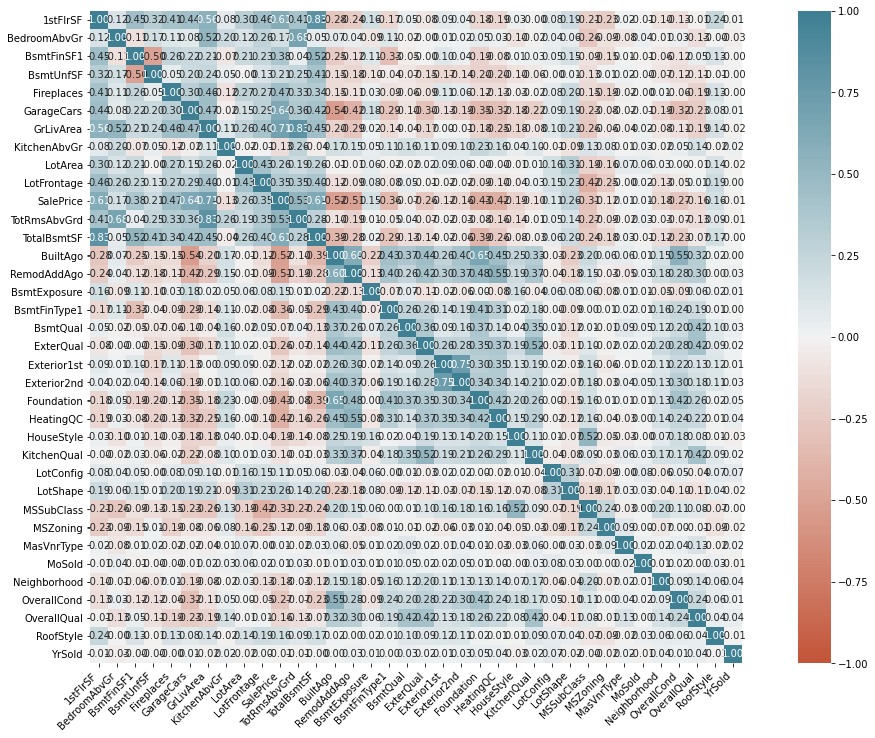

In [45]:
def show_correlation_matrix():
    df = train_data[features_numerical]

    corr = df.corr(method='pearson')


    # HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
    plt.figure(figsize=(20,12))
    ax = sns.heatmap(
     corr,
     vmin=-1, vmax=1, center=0,
     cmap=sns.diverging_palette(20, 220, n=200),
     square=True, annot=True, fmt=".2f"
    )
    # Rota las etiquetas del eje horizontal
    ax.set_xticklabels(
     ax.get_xticklabels(),
     rotation=45,
     horizontalalignment='right'
    )
show_correlation_matrix()

# Clean data (Phase III)

- We will try to drop features highly correlated. We establish the limit in 80&. The feature dropped will be the one that is less correlated to the target SalePrice.


In [46]:
corr = train_data.corr(method='pearson')

for feature1 in features_numerical:
    for feature2 in features_numerical:
        if (feature1!="SalePrice" and feature2!="SalePrice") and abs(corr[feature1][feature2])>0.7 and feature1 is not feature2:
            if (corr[feature1]["SalePrice"]>corr[feature2]["SalePrice"]):
                print("remove {}".format(feature2))
                train_data.drop([feature2],axis='columns', inplace=True, errors='ignore')
                features_numerical.remove(feature2)
            else:
                print("remove {}".format(feature1))
                train_data.drop([feature1],axis='columns', inplace=True, errors='ignore')
                features_numerical.remove(feature1)

remove 1stFlrSF
remove TotRmsAbvGrd
remove Exterior2nd


# Decission Tree (regression)

In [47]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_data_decission = train_data.copy()

target = train_data_decission["SalePrice"]
train_data_decission.drop(['SalePrice'], axis='columns', inplace=True, errors='ignore' )

def decission_tree_regression(features):
    for feature in features:
        median_value = train_data_decission[feature].median()
        train_data_decission[feature] = train_data_decission[feature].fillna(median_value)        
    X = train_data_decission[features] # Features
    y = target # Target variable

    # Split dataset into training set and test set
    # 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

    
    
    dt = DecisionTreeRegressor(random_state=0)
    dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}
    gs_dt = GridSearchCV(dt,dt_params,cv=3)
    gs_dt.fit(X_train,y_train)
    a = gs_dt.best_params_
    dtr=DecisionTreeRegressor(max_depth=13,min_samples_leaf=2)
    model = dtr.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    msle=mean_squared_error(y_pred,y_test)
    rmsle=np.sqrt(msle)
    print('Mean Absolute Error:',mean_absolute_error(y_pred,y_test))
    print('Mean Squared Error:',mean_squared_error(y_pred,y_test))
    print('Root Mean Squared Error:',rmsle) # For decision tree

decission_tree_regression(train_data_decission.columns)

Mean Absolute Error: 29908.594975972042
Mean Squared Error: 2762825587.240848
Root Mean Squared Error: 52562.58733396643


# Random forest (regression)

In [48]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

def random_forest_regression(features):
    for feature in features:
        median_value = train_data_decission[feature].median()
        train_data_decission[feature] = train_data_decission[feature].fillna(median_value)
    X = train_data_decission[features] # Features
    y = target # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

random_forest_regression(train_data_decission.columns)

Mean Absolute Error: 17207.562694158074
Mean Squared Error: 682997589.1343676
Root Mean Squared Error: 26134.222566098415


# Transform SalePrice into a category feature

In [49]:
train_data_classification = train_data.copy()

def group_by_price(price):
    if price<100000:
        return "group1"
    if price<500000:
        return "group2"
    return "group3"
    
train_data_classification['SalePrice'] = train_data_classification.apply (lambda row: group_by_price(row['SalePrice']), axis=1)

# Decission Tree (classification)

In [50]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation 




target = train_data_classification["SalePrice"]
train_data_classification.drop(['SalePrice'], axis='columns', inplace=True, errors='ignore' )

def decission_tree_classification(features):
    for feature in features:
        median_value = train_data_classification[feature].median()
        train_data_classification[feature] = train_data_classification[feature].fillna(median_value)
        
        
    X = train_data_classification[features] # Features
    y = target # Target variable

    # Split dataset into training set and test set
    # 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="entropy")

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    

decission_tree_classification(train_data_classification.columns)

Accuracy: 0.9220183486238532


# Random forest (classification)

In [51]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_classification(features):
    for feature in features:
        median_value = train_data_classification[feature].median()
        train_data_classification[feature] = train_data_classification[feature].fillna(median_value)
    X = train_data_classification[features] # Features
    y = target # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

random_forest_classification(train_data_classification.columns)

Accuracy: 0.9587628865979382
